# MODELO DE RECOMENDACIÓN

## ABC S.A.

In [ ]:
# Primero, realizamos la instalación de scikit-learn
!pip install scikit-learn --upgrade

In [1]:
# A continuación importaremos varias bibliotecas que se utilizarán:

# Biblioteca para trabajar con JSON
import json

# Biblioteca para realizar solicitudes HTTP
import requests

# Biblioteca para exploración y análisis de datos
import pandas as pd

# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np

# Biblioteca para construir un modelo basado en la técnica Gradient Boosting
import xgboost as xgb

# Paquetes scikit-learn para preprocesamiento de datos
# "SimpleImputer" es una transformación para completar los valores faltantes en conjuntos de datos
from sklearn.impute import SimpleImputer

# Paquetes de scikit-learn para entrenamiento de modelos y construcción de pipelines
# Método para separar el conjunto de datos en muestras de testes y entrenamiento
from sklearn.model_selection import train_test_split
# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Paquetes scikit-learn para evaluación de modelos
# Métodos para la validación cruzada del modelo creado
from sklearn.model_selection import KFold, cross_validate

C:\Users\Usuario\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importar  un .csv 

In [61]:
url= "https://raw.githubusercontent.com/JUG2019/RECOMENDACION/master/Data/dataset-abc.csv"
df_training_dataset = pd.read_csv(url, index_col =0)

#df_training_dataset = pd.read_csv(url)
df_training_dataset.tail()

,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
20495,Rose Jurado,66754730,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0,advanced_backend
20496,Johnny Jones,6874888,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0,advanced_front_end
20497,Lawrence Givens,83752787,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0,advanced_backend
20498,Betty Diclaudio,45806698,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0,advanced_front_end
20499,Connie Harper,67068866,51.0,24.0,36.0,4.0,2.0,7.0,0.0,0.0,2.0,63.0,61.0,87.0,advanced_data_science


### Explorando los datos proporcionados

Podemos continuar la exploración de los datos proporcionados con la función ``info()``:

In [62]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 28 to 20499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NAME                              20000 non-null  object 
 1   USER_ID                           20000 non-null  int64  
 2   HOURS_DATASCIENCE                 19986 non-null  float64
 3   HOURS_BACKEND                     19947 non-null  float64
 4   HOURS_FRONTEND                    19984 non-null  float64
 5   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 6   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 7   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 8   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 9   NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 10  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 11  AVG_SCORE_DATASCIENCE             19780 non-null  float64
 12  AVG

### Visualización (visualizations)

Para ver el conjunto de datos suministrado, podemos usar las bibliotecas ``matplotlib`` y ``seaborn``:

In [996]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

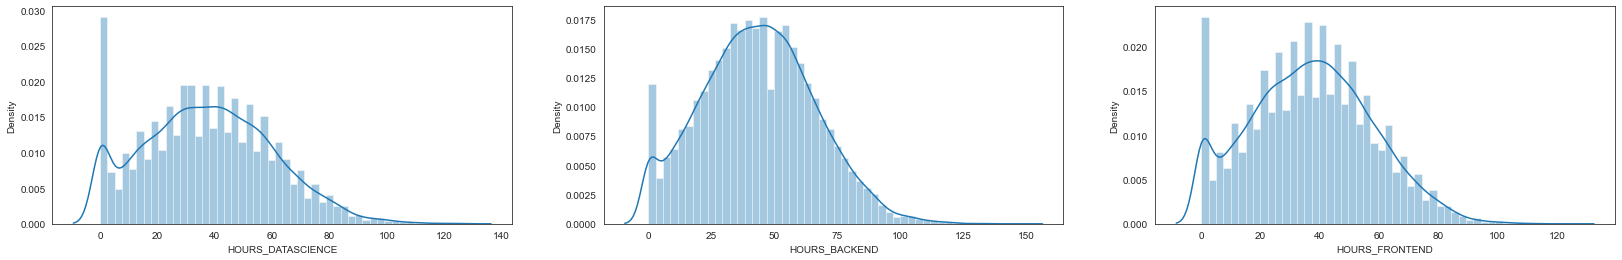

In [997]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_training_dataset['HOURS_DATASCIENCE'].dropna(), ax=axes[0])
sns.distplot(df_training_dataset['HOURS_BACKEND'].dropna(), ax=axes[1])
sns.distplot(df_training_dataset['HOURS_FRONTEND'].dropna(), ax=axes[2])

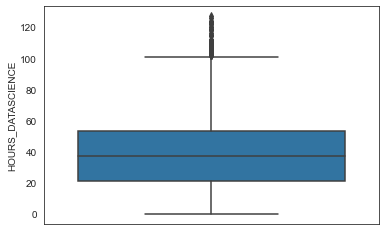

In [998]:
import seaborn as sns

# Make boxplot for one group only
sns.boxplot( y=df_training_dataset['HOURS_DATASCIENCE'] )


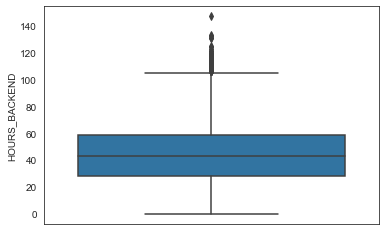

In [999]:

#       

sns.boxplot( y=df_training_dataset['HOURS_BACKEND'] )

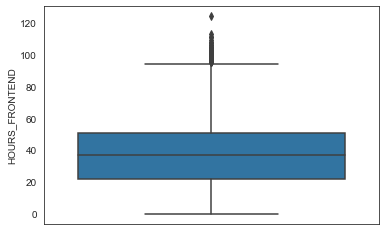

In [1000]:
sns.boxplot( y=df_training_dataset['HOURS_FRONTEND'] )

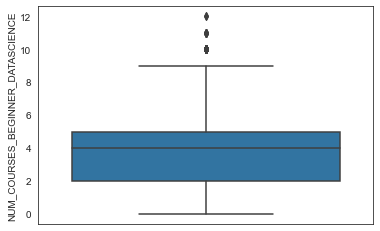

In [1001]:
sns.boxplot( y=df_training_dataset['NUM_COURSES_BEGINNER_DATASCIENCE'] )

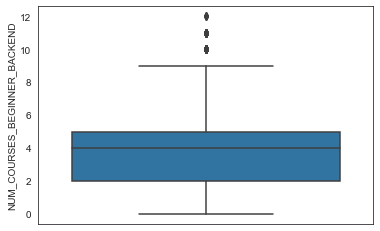

In [1002]:
sns.boxplot( y=df_training_dataset['NUM_COURSES_BEGINNER_BACKEND'] )

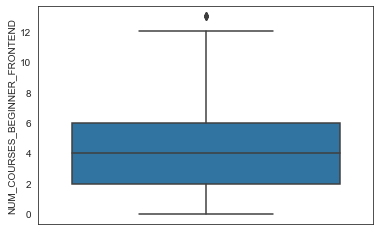

In [1003]:
sns.boxplot( y=df_training_dataset['NUM_COURSES_BEGINNER_FRONTEND'] )

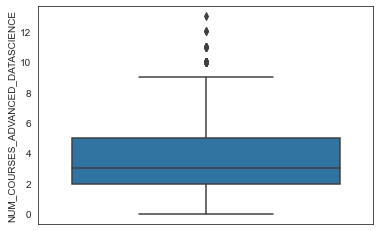

In [1004]:
sns.boxplot( y=df_training_dataset['NUM_COURSES_ADVANCED_DATASCIENCE'] )

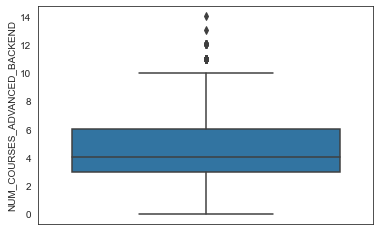

In [1005]:
sns.boxplot( y=df_training_dataset['NUM_COURSES_ADVANCED_BACKEND'] )

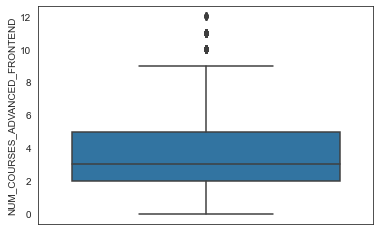

In [1006]:
sns.boxplot( y=df_training_dataset['NUM_COURSES_ADVANCED_FRONTEND'] )

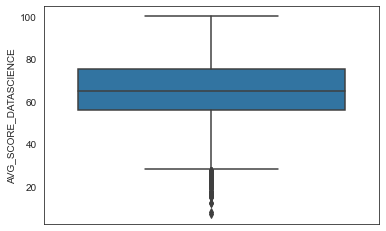

In [1007]:
sns.boxplot( y=df_training_dataset['AVG_SCORE_DATASCIENCE'] )

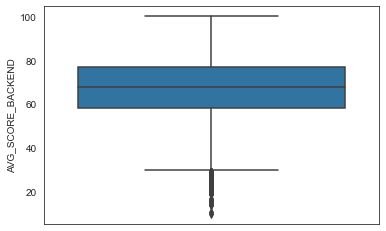

In [1008]:
sns.boxplot( y=df_training_dataset['AVG_SCORE_BACKEND'] )

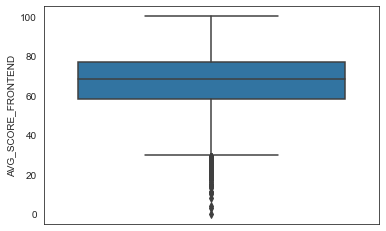

In [1009]:
sns.boxplot( y=df_training_dataset['AVG_SCORE_FRONTEND'] )

In [63]:
df_training_dataset.columns

Index(['NAME', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE'],
      dtype='object')

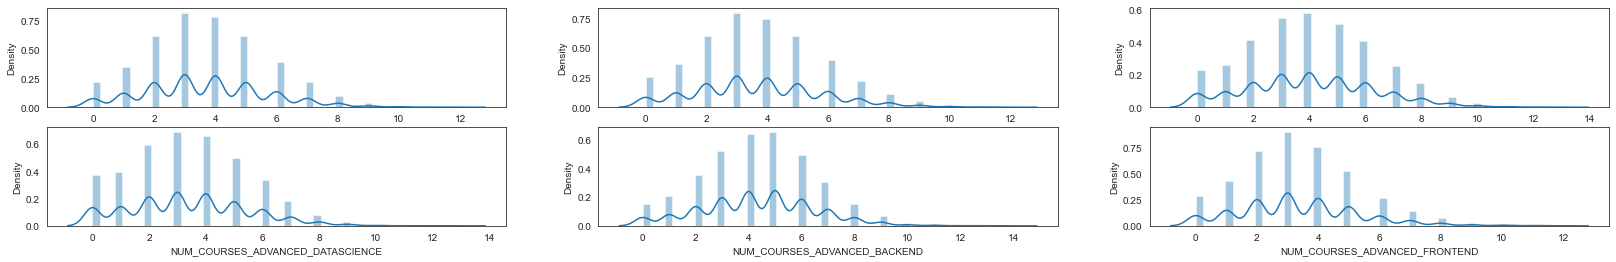

In [1011]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 4))

sns.distplot(df_training_dataset['NUM_COURSES_BEGINNER_DATASCIENCE'].dropna(), ax=axes[0][0])
sns.distplot(df_training_dataset['NUM_COURSES_BEGINNER_BACKEND'].dropna(), ax=axes[0][1])
sns.distplot(df_training_dataset['NUM_COURSES_BEGINNER_FRONTEND'].dropna(), ax=axes[0][2])
sns.distplot(df_training_dataset['NUM_COURSES_ADVANCED_DATASCIENCE'].dropna(), ax=axes[1][0])
sns.distplot(df_training_dataset['NUM_COURSES_ADVANCED_BACKEND'].dropna(), ax=axes[1][1])
sns.distplot(df_training_dataset['NUM_COURSES_ADVANCED_FRONTEND'].dropna(), ax=axes[1][2])

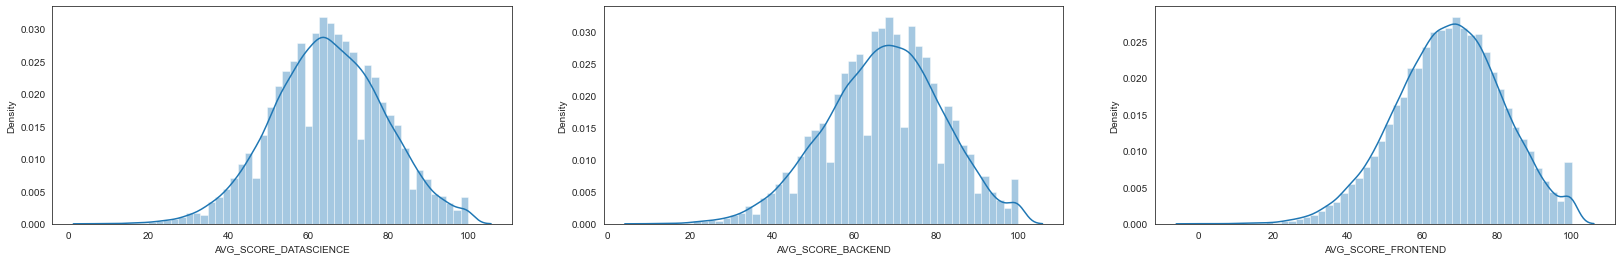

In [1012]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_training_dataset['AVG_SCORE_DATASCIENCE'].dropna(), ax=axes[0])
sns.distplot(df_training_dataset['AVG_SCORE_BACKEND'].dropna(), ax=axes[1])
sns.distplot(df_training_dataset['AVG_SCORE_FRONTEND'].dropna(), ax=axes[2])

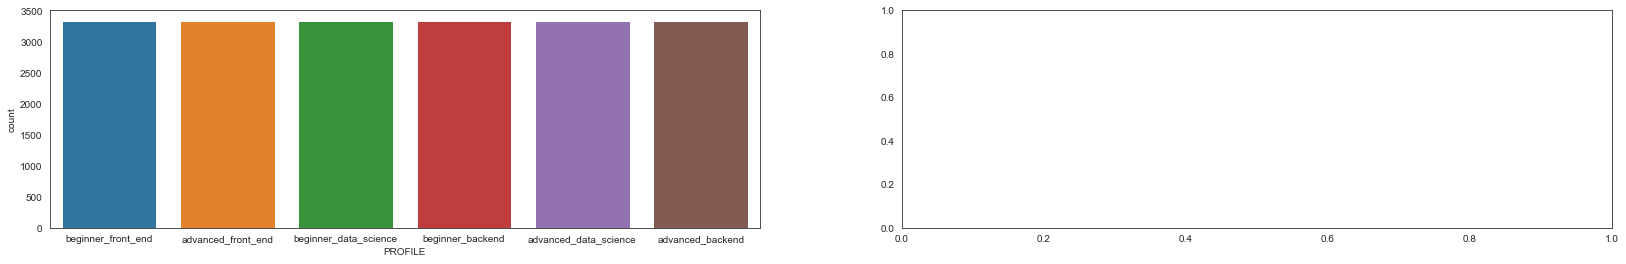

In [1013]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 4))

sns.countplot(ax=axes[0], x='PROFILE', data=df_training_dataset)

In [64]:
l_class = df_training_dataset['PROFILE'].value_counts()
n_class= l_class.shape[0]
n_class

6

### Preprocesamiento de datos

#### Transformación 1: excluir columnas del conjunto de datos

Para la creación de una transformación de datos personalizada en scikit-learn, es necesario crear una clase con los métodos ``transform`` y ``fit``. En el método de 'transform', se ejecutará la lógica de nuestra transformación.

La siguiente celda muestra el código completo de una transformación ``DropColumns`` para eliminar columnas de un pandas DataFrame.

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')

Para aplicar esa transformación en un pandas DataFrame pandas, basta instanciar un objeto *DropColumns* y llamar el método transform().

In [66]:
# Creación de instancias de una transformación DropColumns
rm_columns = DropColumns(
    columns=["NAME", "USER_ID"]  # Esta transformación toma como parámetro una lista con los nombres de las columnas no deseadas
)

print(rm_columns)

DropColumns(columns=['NAME', 'USER_ID'])


In [67]:
# Ver las columnas del conjunto de datos original
print("Columnas del conjunto de datos original: \n")
print(df_training_dataset.columns)

Columnas del conjunto de datos original: 

Index(['NAME', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE'],
      dtype='object')


In [68]:
# Aplicar la transformación ``DropColumns`` al conjunto de datos base
rm_columns.fit(X=df_training_dataset)

# Reconstruyendo un DataFrame de Pandas con el resultado de la transformación
df_training_dataset_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_training_dataset
    ),
)

In [69]:
# Ver las columnas del conjunto de datos transformado
print("Columnas del conjunto de datos después de la transformación ``DropColumns``: \n")
print(df_training_dataset_2.columns)

Columnas del conjunto de datos después de la transformación ``DropColumns``: 

Index(['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND',
       'PROFILE'],
      dtype='object')


Tenga en cuenta que la columna "NOMBRE" se ha eliminado y nuestro conjunto de datos ahora solo tiene 14 columnas.

#### Transformación 2: tratamiento de datos faltantes

Para manejar los datos que faltan en nuestro conjunto de datos, ahora usaremos una transformación lista para usar de la biblioteca scikit-learn, llamada **SimpleImputer**.

Esta transformación permite varias estrategias para el tratamiento de datos faltantes. La documentación oficial se puede encontrar en: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

En este ejemplo, simplemente haremos cero todos los valores faltantes.

In [70]:
# Crear un objeto ``SimpleImputer``
si = SimpleImputer(
    missing_values=np.nan,  # los valores que faltan son del tipo ``np.nan`` (Pandas estándar)
    strategy='constant',  # la estrategia elegida es cambiar el valor faltante por una constante
    fill_value=0,  # la constante que se usará para completar los valores faltantes es un int64 = 0
    verbose=0,
    copy=True
)

In [71]:
# Crear un objeto ``SimpleImputer``
imp_mean  = SimpleImputer(
    missing_values=np.nan,  # los valores que faltan son del tipo ``np.nan`` (Pandas estándar)
    strategy='mean',  # la estrategia elegida es cambiar el valor faltante por una constante= 0
    verbose=0,
    copy=True
)

In [72]:
# Ver los datos faltantes del conjunto de datos antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_2.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

HOURS_DATASCIENCE                    14
HOURS_BACKEND                        53
HOURS_FRONTEND                       16
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
PROFILE                               0
dtype: int64



In [73]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

       def __init__(self):
           """Impute missing values.

           Columns of dtype object are imputed with the most frequent value 
           in column.

           Columns of other types are imputed with mean of column.

           """
       def fit(self, X, y=None):

           self.fill = pd.Series([X[c].value_counts().index[0]
               if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
               index=X.columns)

           return self

       def transform(self, X, y=None):
           return X.fillna(self.fill)


#X = pd.DataFrame(df_training_dataset_rmcolumns)
df_training_dataset_imp = DataFrameImputer().fit_transform(df_training_dataset_2)

In [74]:
# Ver los datos faltantes del conjunto de datos DESPUES de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_imp.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
PROFILE                             0
dtype: int64



In [75]:
df_training_dataset_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 20000 non-null  float64
 1   HOURS_BACKEND                     20000 non-null  float64
 2   HOURS_FRONTEND                    20000 non-null  float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  20000 non-null  float64
 4   NUM_COURSES_BEGINNER_BACKEND      20000 non-null  float64
 5   NUM_COURSES_BEGINNER_FRONTEND     20000 non-null  float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  20000 non-null  float64
 7   NUM_COURSES_ADVANCED_BACKEND      20000 non-null  float64
 8   NUM_COURSES_ADVANCED_FRONTEND     20000 non-null  float64
 9   AVG_SCORE_DATASCIENCE             20000 non-null  float64
 10  AVG_SCORE_BACKEND                 20000 non-null  float64
 11  AVG_SCORE_FRONTEND                20000 non-null  float64
 12  PROF

Tenga en cuenta que ya no tenemos valores perdidos en nuestro conjunto de datos :)

Vale la pena señalar que cambiar los valores perdidos por 0 no siempre es la mejor estrategia. Se anima al participante a estudiar e implementar diferentes estrategias para tratar los valores perdidos para mejorar su modelo y mejorar su puntuación final.

### Entrenando un modelo de clasificación

Una vez finalizado el preprocesamiento, ya tenemos el conjunto de datos en el formato necesario para entrenar nuestro modelo:

In [76]:
#df_training_dataset_imp.head()

In [77]:
df_training_dataset_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 20000 non-null  float64
 1   HOURS_BACKEND                     20000 non-null  float64
 2   HOURS_FRONTEND                    20000 non-null  float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  20000 non-null  float64
 4   NUM_COURSES_BEGINNER_BACKEND      20000 non-null  float64
 5   NUM_COURSES_BEGINNER_FRONTEND     20000 non-null  float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  20000 non-null  float64
 7   NUM_COURSES_ADVANCED_BACKEND      20000 non-null  float64
 8   NUM_COURSES_ADVANCED_FRONTEND     20000 non-null  float64
 9   AVG_SCORE_DATASCIENCE             20000 non-null  float64
 10  AVG_SCORE_BACKEND                 20000 non-null  float64
 11  AVG_SCORE_FRONTEND                20000 non-null  float64
 12  PROF

En el ejemplo proporcionado, usaremos todas las columnas, excepto la columna **Profile** como *feautres* (variables de entrada).

La variable **Profile** será la variable objetivo del modelo, como se describe en la declaración de desafío.

#### Definición de features del modelo

In [78]:
# Definición de las columnas que seran features (Notese que la columna NOMBRE no esta presente)
features = [
    "HOURS_DATASCIENCE", "HOURS_BACKEND", "HOURS_FRONTEND",
    "NUM_COURSES_BEGINNER_DATASCIENCE", "NUM_COURSES_BEGINNER_BACKEND", "NUM_COURSES_BEGINNER_FRONTEND",
    "NUM_COURSES_ADVANCED_DATASCIENCE", "NUM_COURSES_ADVANCED_BACKEND", "NUM_COURSES_ADVANCED_FRONTEND",
    "AVG_SCORE_DATASCIENCE", "AVG_SCORE_BACKEND", "AVG_SCORE_FRONTEND"
]

# Definición de variable objetivo
target = ['PROFILE']

# Preparación de los argumentos para los métodos de la biblioteca ``scikit-learn``
X = df_training_dataset_imp[features]
y = df_training_dataset_imp[target]

## vif

In [79]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [80]:
vif_features = "+".join(features)

# get y and X dataframes based on this regression:
yvif, Xvif = dmatrices('PROFILE ~' + vif_features, df_training_dataset_imp, return_type='dataframe')

In [81]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]
vif["features"] = Xvif.columns

In [82]:
vif.round(2)

,VIF Factor,features
0,102.72,Intercept
1,1.28,HOURS_DATASCIENCE
2,1.12,HOURS_BACKEND
3,1.10,HOURS_FRONTEND
4,1.26,NUM_COURSES_BEGINNER_DATASCIENCE
5,1.12,NUM_COURSES_BEGINNER_BACKEND
6,1.15,NUM_COURSES_BEGINNER_FRONTEND
7,1.09,NUM_COURSES_ADVANCED_DATASCIENCE
8,1.10,NUM_COURSES_ADVANCED_BACKEND
9,1.13,NUM_COURSES_ADVANCED_FRONTEND


### CORRELACION

In [83]:
# PARA GRAFICO DE CORRELACIÓN

dfa= X.copy()
dfa['PROFILE']= y
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 20000 non-null  float64
 1   HOURS_BACKEND                     20000 non-null  float64
 2   HOURS_FRONTEND                    20000 non-null  float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  20000 non-null  float64
 4   NUM_COURSES_BEGINNER_BACKEND      20000 non-null  float64
 5   NUM_COURSES_BEGINNER_FRONTEND     20000 non-null  float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  20000 non-null  float64
 7   NUM_COURSES_ADVANCED_BACKEND      20000 non-null  float64
 8   NUM_COURSES_ADVANCED_FRONTEND     20000 non-null  float64
 9   AVG_SCORE_DATASCIENCE             20000 non-null  float64
 10  AVG_SCORE_BACKEND                 20000 non-null  float64
 11  AVG_SCORE_FRONTEND                20000 non-null  float64
 12  PROF

In [84]:
dfa.PROFILE=dfa.PROFILE.astype("category").cat.codes

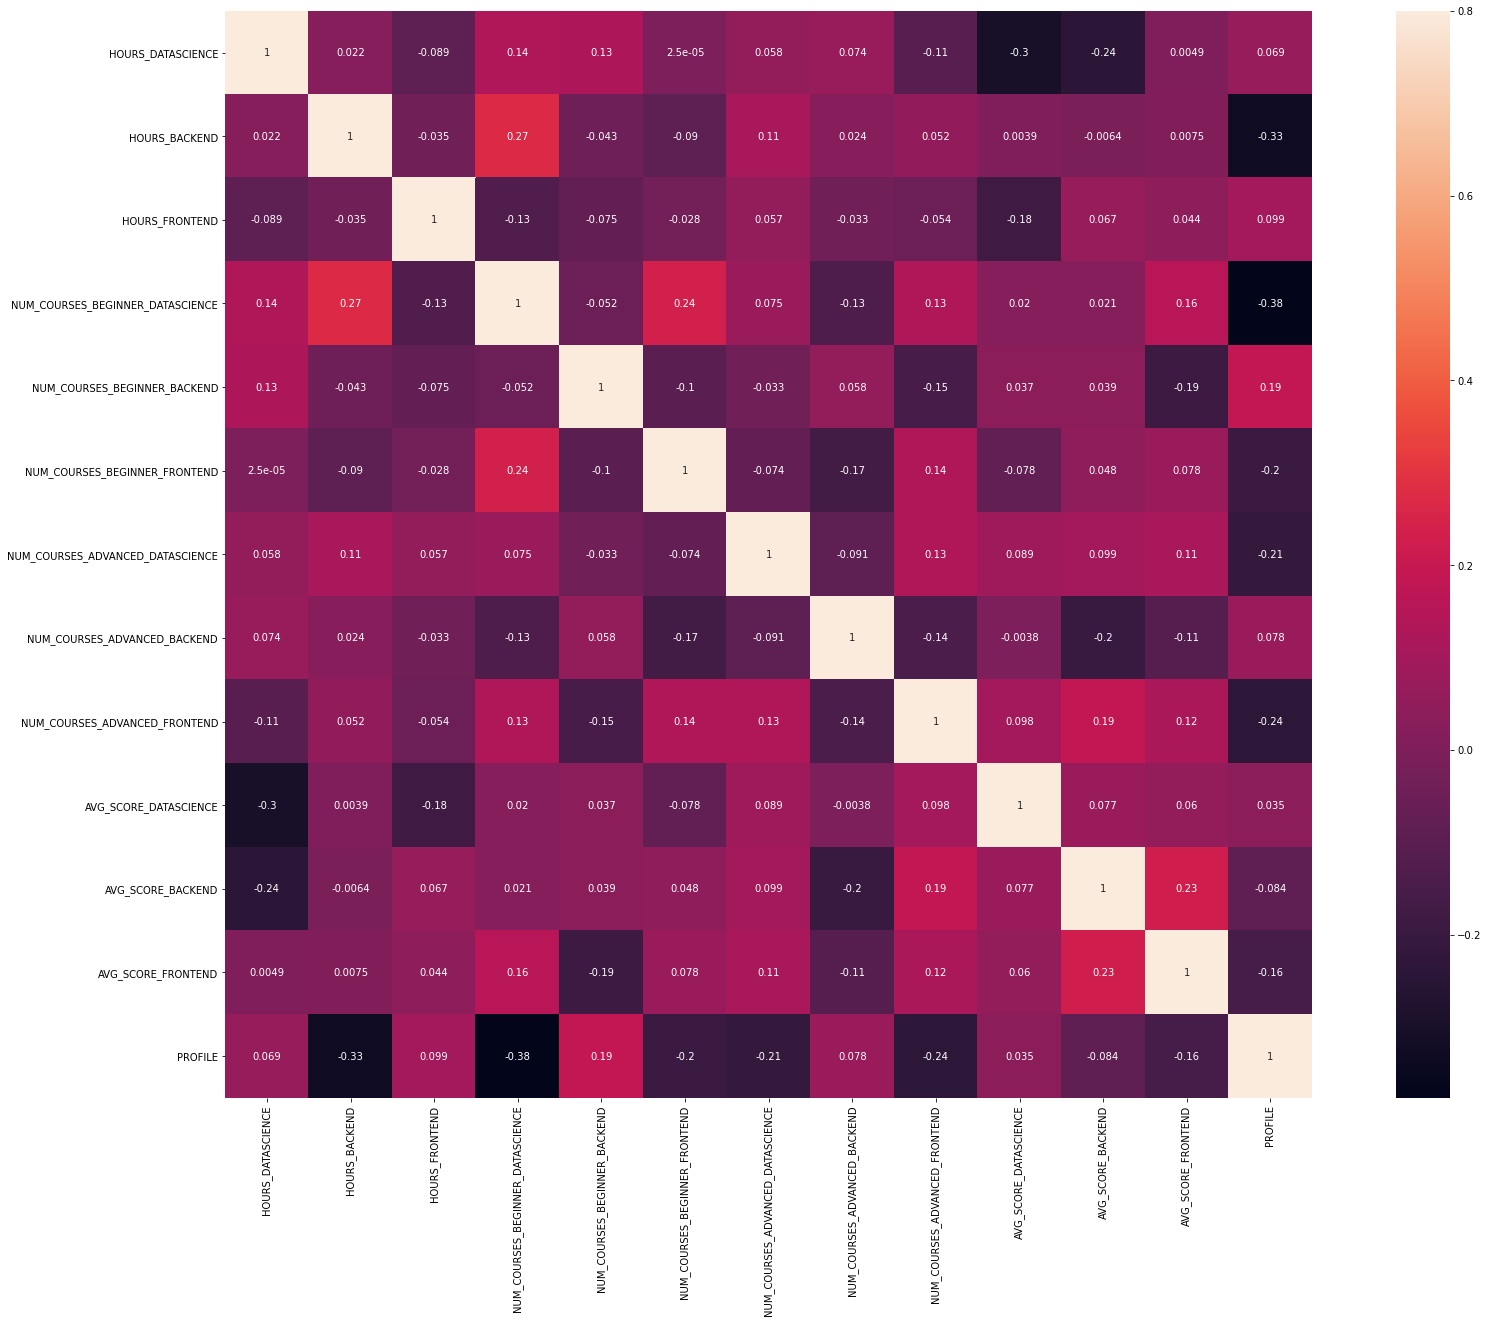

In [85]:


#dfa.TARGET=dfa.TARGET.astype("category").cat.codes

corr = dfa.corr() 

fig = plt.figure(figsize=(30,20))

sns.heatmap(corr, vmax=.8, square=True,annot=True)

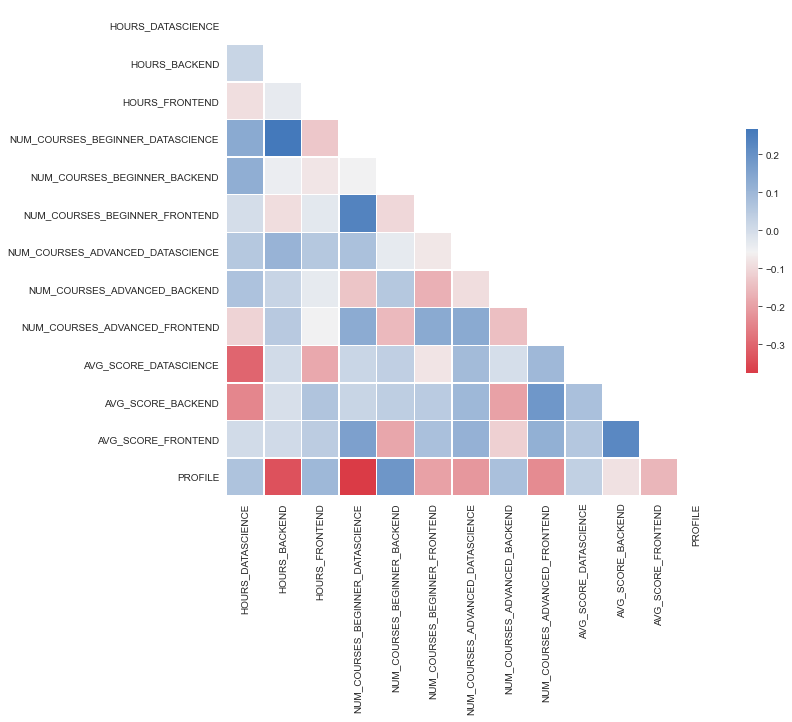

In [86]:
# Exclude duplicate correlations by masking uper right values
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## El conjunto de entrada (X):

In [87]:
X.head()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,68.0
1,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,68.0
2,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,65.0,54.0,47.0
3,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,65.0,71.0,89.0
4,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,68.0


La variable objetivo (y):

In [88]:
y.head()

,PROFILE
0,beginner_front_end
1,beginner_front_end
2,advanced_front_end
3,beginner_data_science
4,advanced_front_end


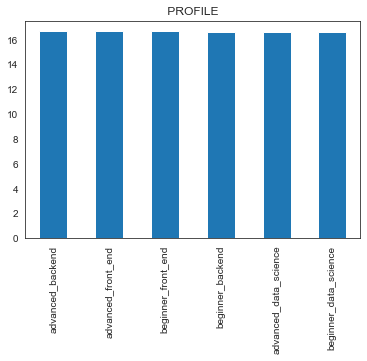

In [89]:
# gráfico de barras de frecuencias relativas.
plot = (100 * y['PROFILE'].value_counts() / len(y["PROFILE"])).plot(
kind='bar', title=' PROFILE ')

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 20000 non-null  float64
 1   HOURS_BACKEND                     20000 non-null  float64
 2   HOURS_FRONTEND                    20000 non-null  float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  20000 non-null  float64
 4   NUM_COURSES_BEGINNER_BACKEND      20000 non-null  float64
 5   NUM_COURSES_BEGINNER_FRONTEND     20000 non-null  float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  20000 non-null  float64
 7   NUM_COURSES_ADVANCED_BACKEND      20000 non-null  float64
 8   NUM_COURSES_ADVANCED_FRONTEND     20000 non-null  float64
 9   AVG_SCORE_DATASCIENCE             20000 non-null  float64
 10  AVG_SCORE_BACKEND                 20000 non-null  float64
 11  AVG_SCORE_FRONTEND                20000 non-null  float64
dtypes: f

#### Separar el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba

In [91]:
# Separación de datos en conjunto de entrenamiento y conjunto de pruebas
#337
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)

## outliers

In [92]:
import numpy as np
from scipy.stats import zscore

z_scores = zscore(X_train)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_entries.shape

(14000,)

In [93]:
X_train2 = X_train[filtered_entries]

In [94]:
y_train2 = y_train[filtered_entries]

In [95]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13490 entries, 15979 to 12548
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 13490 non-null  float64
 1   HOURS_BACKEND                     13490 non-null  float64
 2   HOURS_FRONTEND                    13490 non-null  float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  13490 non-null  float64
 4   NUM_COURSES_BEGINNER_BACKEND      13490 non-null  float64
 5   NUM_COURSES_BEGINNER_FRONTEND     13490 non-null  float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  13490 non-null  float64
 7   NUM_COURSES_ADVANCED_BACKEND      13490 non-null  float64
 8   NUM_COURSES_ADVANCED_FRONTEND     13490 non-null  float64
 9   AVG_SCORE_DATASCIENCE             13490 non-null  float64
 10  AVG_SCORE_BACKEND                 13490 non-null  float64
 11  AVG_SCORE_FRONTEND                13490 non-null  float64
dtype

## ESCALAR 

In [96]:
from sklearn.preprocessing import StandardScaler

#features = df[["col1", "col2", "col3", "col4"]]
#df[features] = autoscaler.fit_transform(df[features])

sc = StandardScaler()

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test)

<hr>

### XGBOOST

In [97]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import gc
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score, recall_score, accuracy_score

from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
xgbc = XGBClassifier(objective='multi:softprob', n_estimators=600, max_depth =6, learning_rate = 0.1, num_class = n_class, colsample_bytree=0.8 , min_child_weight= 1 , gamma= 0.05 , subsample = 0.6 )
print(xgbc)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=0.05,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_class=6,
              num_parallel_tree=None, objective='multi:softprob',
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=0.6, tree_method=None,
              validate_parameters=None, verbosity=None)


In [99]:
eval_set = [(X_train2, y_train2), (X_test2, y_test)]
xgbc.fit(X_train2, y_train2, eval_metric=["merror","mlogloss"], eval_set=eval_set, verbose=False)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.05, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_class=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
y_pred = xgbc.predict(X_test2)

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

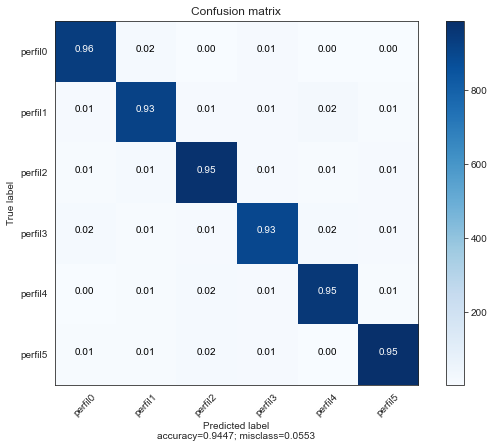

In [102]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

In [103]:
from sklearn.metrics import f1_score

In [104]:
f1_score(y_test, y_pred, average=None)

array([0.95461499, 0.93380855, 0.94396135, 0.93236212, 0.94883259,
       0.95362319])

In [105]:
import matplotlib.pyplot as plt


Feature: 0, Score: 0.08007
Feature: 1, Score: 0.07575
Feature: 2, Score: 0.06934
Feature: 3, Score: 0.09165
Feature: 4, Score: 0.10279
Feature: 5, Score: 0.10287
Feature: 6, Score: 0.07652
Feature: 7, Score: 0.09738
Feature: 8, Score: 0.08589
Feature: 9, Score: 0.08571
Feature: 10, Score: 0.05951
Feature: 11, Score: 0.07251


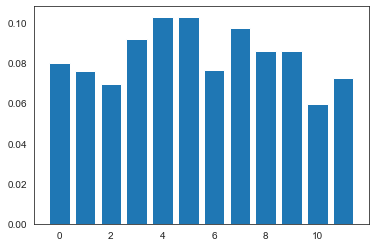

In [106]:
# get importance
importance = xgbc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [107]:
from xgboost import plot_importance

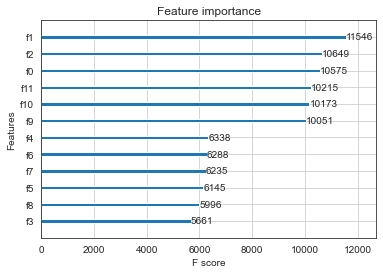

In [108]:
plot_importance(xgbc)

### Guarda modelo 

In [109]:
#xgbc.save_model('des2.model')

filename='des2.model'

In [110]:
import joblib
#save model
joblib.dump(xgbc, filename) 



['des2.model']

### NUEVOS DATOS

In [115]:


url2 = "https://raw.githubusercontent.com/JUG2019/RECOMENDACION/master/Data/dataset-abc-new.csv"
df_to_be_scored= pd.read_csv(url2)
df_to_be_scored.tail()

,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
495,Eileen Finley,1147648,0,56,11,2,1,8,5,2,6,80,93,35
496,Cedric Buss,33729943,50,53,5,4,1,4,8,4,4,59,59,50
497,James Ray,62724217,35,35,63,3,0,0,5,3,5,35,54,59
498,Lauren Vega,71562358,42,4,58,6,6,5,7,7,5,78,59,79
499,Joshua Brown,48754463,6,47,39,5,2,8,5,4,9,88,83,61


In [116]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NAME                              500 non-null    object
 1   USER_ID                           500 non-null    int64 
 2   HOURS_DATASCIENCE                 500 non-null    int64 
 3   HOURS_BACKEND                     500 non-null    int64 
 4   HOURS_FRONTEND                    500 non-null    int64 
 5   NUM_COURSES_BEGINNER_DATASCIENCE  500 non-null    int64 
 6   NUM_COURSES_BEGINNER_BACKEND      500 non-null    int64 
 7   NUM_COURSES_BEGINNER_FRONTEND     500 non-null    int64 
 8   NUM_COURSES_ADVANCED_DATASCIENCE  500 non-null    int64 
 9   NUM_COURSES_ADVANCED_BACKEND      500 non-null    int64 
 10  NUM_COURSES_ADVANCED_FRONTEND     500 non-null    int64 
 11  AVG_SCORE_DATASCIENCE             500 non-null    int64 
 12  AVG_SCORE_BACKEND     

In [117]:
# Ver los datos faltantes del conjunto de datos antes de la segunda transformación (SimpleImputer) (df_data_3)
print("Valores nulos en el conjunto de datos después de la transformación SimpleImputer: \n\n{}\n".format(df_to_be_scored.isnull().sum(axis = 0)))

Valores nulos en el conjunto de datos después de la transformación SimpleImputer: 

NAME                                0
USER_ID                             0
HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
dtype: int64



In [118]:
# Aplicar la transformación ``DropColumns`` al conjunto de datos base
rm_columns.fit(X=df_to_be_scored)

# Reconstruyendo un DataFrame de Pandas con el resultado de la transformación
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_to_be_scored
    ),
)

In [119]:
df_to_be_scored_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   HOURS_DATASCIENCE                 500 non-null    int64
 1   HOURS_BACKEND                     500 non-null    int64
 2   HOURS_FRONTEND                    500 non-null    int64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  500 non-null    int64
 4   NUM_COURSES_BEGINNER_BACKEND      500 non-null    int64
 5   NUM_COURSES_BEGINNER_FRONTEND     500 non-null    int64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  500 non-null    int64
 7   NUM_COURSES_ADVANCED_BACKEND      500 non-null    int64
 8   NUM_COURSES_ADVANCED_FRONTEND     500 non-null    int64
 9   AVG_SCORE_DATASCIENCE             500 non-null    int64
 10  AVG_SCORE_BACKEND                 500 non-null    int64
 11  AVG_SCORE_FRONTEND                500 non-null    int64
dtypes: int64(12)
memory usage: 47.0 KB


In [120]:
# Ver los datos faltantes del conjunto de datos después de la segunda transformación (SimpleImputer) (df_data_3)
print("Valores nulos en el conjunto de datos después de la transformación SimpleImputer: \n\n{}\n".format(df_to_be_scored_2.isnull().sum(axis = 0)))

Valores nulos en el conjunto de datos después de la transformación SimpleImputer: 

HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
dtype: int64



In [121]:
# Aplicamos el SimpleImputer ``imp_median`` al conjunto de datos df_data_2 (resultado de la primera transformación)
imp_mean.fit(X=df_to_be_scored_2)

# Reconstrucción de un nuevo DataFrame de Pandas con el conjunto imputado (df_data_3)
df_to_be_scored_3 = pd.DataFrame.from_records(
    data=imp_mean.transform(
        X=df_to_be_scored_2
    ),  # el resultado SimpleImputer.transform (<< pandas dataframe >>) es lista lista
    columns=X.columns  # las columnas originales deben conservarse en esta transformación
)

In [122]:
# Ver los datos faltantes del conjunto de datos después de la segunda transformación (SimpleImputer) (df_data_3)
print("Valores nulos en el conjunto de datos después de la transformación SimpleImputer: \n\n{}\n".format(df_to_be_scored_3.isnull().sum(axis = 0)))

Valores nulos en el conjunto de datos después de la transformación SimpleImputer: 

HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
dtype: int64



In [123]:
df_to_be_scored_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HOURS_DATASCIENCE                 500 non-null    float64
 1   HOURS_BACKEND                     500 non-null    float64
 2   HOURS_FRONTEND                    500 non-null    float64
 3   NUM_COURSES_BEGINNER_DATASCIENCE  500 non-null    float64
 4   NUM_COURSES_BEGINNER_BACKEND      500 non-null    float64
 5   NUM_COURSES_BEGINNER_FRONTEND     500 non-null    float64
 6   NUM_COURSES_ADVANCED_DATASCIENCE  500 non-null    float64
 7   NUM_COURSES_ADVANCED_BACKEND      500 non-null    float64
 8   NUM_COURSES_ADVANCED_FRONTEND     500 non-null    float64
 9   AVG_SCORE_DATASCIENCE             500 non-null    float64
 10  AVG_SCORE_BACKEND                 500 non-null    float64
 11  AVG_SCORE_FRONTEND                500 non-null    float64
dtypes: float

## scalar

In [124]:
df_to_be_scored_4 = sc.transform(df_to_be_scored_3)

### Carga modelo 

In [125]:
#bst = xgb.Booster({'nthread': 4})  # init model
filename='des2.model'

In [126]:
import joblib

#load saved model
xgbc2 = joblib.load(filename)

In [127]:
# Realización de una prueba a ciegas en el modelo creado
y_pred2 = xgbc2.predict(df_to_be_scored_4)

In [128]:
y_pred2

array(['advanced_backend', 'beginner_front_end', 'advanced_backend',
       'advanced_data_science', 'beginner_data_science',
       'beginner_data_science', 'advanced_front_end',
       'beginner_data_science', 'advanced_front_end',
       'advanced_data_science', 'advanced_data_science',
       'beginner_backend', 'beginner_front_end', 'advanced_front_end',
       'beginner_data_science', 'beginner_front_end',
       'advanced_front_end', 'advanced_front_end', 'beginner_front_end',
       'beginner_front_end', 'advanced_data_science',
       'beginner_data_science', 'advanced_backend', 'advanced_backend',
       'advanced_backend', 'beginner_front_end', 'advanced_backend',
       'beginner_backend', 'advanced_data_science', 'advanced_backend',
       'advanced_backend', 'beginner_front_end', 'advanced_backend',
       'advanced_front_end', 'beginner_backend', 'beginner_backend',
       'beginner_backend', 'beginner_backend', 'advanced_backend',
       'beginner_front_end', 'advanced_

In [129]:
# Agregando las respuestas en la columna "target"
df_to_be_scored_3['target'] = y_pred2
df_to_be_scored_3.tail()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,target
495,0.0,56.0,11.0,2.0,1.0,8.0,5.0,2.0,6.0,80.0,93.0,35.0,advanced_backend
496,50.0,53.0,5.0,4.0,1.0,4.0,8.0,4.0,4.0,59.0,59.0,50.0,advanced_backend
497,35.0,35.0,63.0,3.0,0.0,0.0,5.0,3.0,5.0,35.0,54.0,59.0,beginner_data_science
498,42.0,4.0,58.0,6.0,6.0,5.0,7.0,7.0,5.0,78.0,59.0,79.0,beginner_front_end
499,6.0,47.0,39.0,5.0,2.0,8.0,5.0,4.0,9.0,88.0,83.0,61.0,advanced_backend


### Guardar la hoja de respuestas como un archivo .csv


In [130]:
df_to_be_scored_3.to_csv('dataset-abc-final.csv')